In [1]:
import import_ipynb
import pickle
from sklearn.ensemble import VotingClassifier

In [2]:
import seaborn

In [3]:
import pandas as pd
import numpy as np
import re

In [4]:
from sklearn import svm

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
#import Pathconfig as pg

In [8]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [9]:
import enchant
from textblob import Word
from textblob import TextBlob

In [10]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [11]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [12]:
from sklearn.metrics import accuracy_score, f1_score

In [13]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor

In [14]:
from sklearn.metrics import (
    confusion_matrix,
    roc_auc_score,
    recall_score,
    precision_score,
)

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import make_scorer, accuracy_score, f1_score


In [15]:
#paths
pathdata='C:/Users/su/Desktop/Major_Project_work/data/data.csv'
pathStopwords = 'C:/Users/su/Desktop/Major_Project_work/Models/stopwords.txt'

In [16]:
open(pathStopwords)

<_io.TextIOWrapper name='C:/Users/su/Desktop/Major_Project_work/Models/stopwords.txt' mode='r' encoding='cp1252'>

In [17]:
#extract dataset and removing undefined , replace PI and No PI with yes and no.
def extract(path):
    fd = open(path, encoding="utf-8", errors='replace')
    df = pd.read_csv(fd)
    defined = df['class'] != ("undefined")
    # #output dataframe without undeined
    df2 = df[defined]
    defined1 = df2['class'] != "Undefined"
    df4 = df2[defined1]
    # replace no PI with no
    df3 = df4.replace("No PI", "no")
    # replace PI with yes
    final = df3.replace("PI", "yes")
    replace_yes = final.replace("Yes", "yes")
    final_df = replace_yes.replace("No", "no")
    return final_df, df

In [18]:
final_data_frame , data_frame_undefined =extract(pathdata)

In [18]:
data_frame_undefined


NameError: name 'data_frame_undefined' is not defined

In [20]:
# LOWERCASE
final_data_frame["text"] = final_data_frame["text"].apply(
    lambda x: " ".join(x.lower() for x in x.split())
)
print("lowercase all text")
print(final_data_frame["text"].head())
print()

lowercase all text
0    i'll @buy the iphone x if it can get accurate ...
1    some dude in fb selling the iphone x 64 gb for...
2    home dab emote man today and i get hopped on b...
3                                      buy an iphone x
4    i hate ios 11. my iphone 6+ works 10x slower n...
Name: text, dtype: object



In [21]:
y = (data_frame_undefined['class']) .value_counts()
print(y)

undefined    790
yes          462
no           424
Undefined    157
PI           151
Yes           85
No            38
No PI          1
Name: class, dtype: int64


In [22]:
yes_no_count = (final_data_frame['class']) .value_counts()
print(yes_no_count)

yes    698
no     463
Name: class, dtype: int64


In [23]:
def read_stopwords(path):
    file1 = open(path, "r")
    stopword = file1.readlines()
    file1.close()
    li_stopwords = stopword[0].split()
    return li_stopwords

In [24]:
#check spelling 
def check_english(temp_df):
    d = enchant.Dict("en_US")
    #print(d)
    new_eng = pd.DataFrame()
    count = 0

    for sentence in temp_df['text']:
        temp_sent = ""
        for word in sentence.split():
            temp = word.lower()
            if d.check(word):
               # print("ammar")
                temp_sent = temp_sent + temp + " "
        #print(temp_sent)
        new_eng.at[count, 'text'] = temp_sent
        new_eng.at[count, 'class'] = temp_df.iloc[count]['class']
        count += 1
    #print(new_eng)
    return new_eng

In [25]:
def handle_negation(final_df):
    out_df = pd.DataFrame()
    count_tweet = 0
    for text in final_df['text']:
        temp_text = ""
        li_text = text.split()
        for word in li_text:
            count = 0
            lower_word = word.lower()
            if lower_word == "didn't" or lower_word == "not" or lower_word == "no" or lower_word == "never"\
                    or lower_word == "don't":
                temp = count + 1
                temp_text = temp_text + word + " "
                for i in range(temp, len(li_text)):
                    if li_text[i] in [",", "?", "!", "."]:
                        temp_text = " "+temp_text + li_text[i] + " "
                        break
                    else:
                        temp_text = temp_text + "NOT_" + li_text[i]+" "

            else:
                temp_text = temp_text + word + " "
        # print(temp_text)
        out_df.at[count_tweet, 'text'] = temp_text
        out_df.at[count_tweet, 'class'] = final_df.iloc[count_tweet]['class']
        count_tweet += 1
    return out_df

In [26]:
new_eng = check_english(final_data_frame)

In [27]:
def Stemming(temp_df):
    new_eng = pd.DataFrame()
    count = 0
    
    for sentence in temp_df['text']:
        temp_sent = ""
        for word in sentence.split():
            temp = ps.stem(word.lower())
            temp_sent = temp_sent + temp + " "
        print(temp_sent)
        new_eng.at[count, 'text'] = temp_sent
        new_eng.at[count, 'class'] = temp_df.iloc[count]['class']
        count += 1
    # print(new_eng)
    return new_eng


In [28]:
stem_df=Stemming(new_eng)

the x if it can get accur fuck weather report 
some dude in sell the x 64 for like nigga no one is gonna buy that shit when they can get the 256 for that price 
home dab emot man today and i get hop on by two full diamond 5 minut after w tap too thank for the same here in my bedroom with my brand new x x rate sexiest thing 
buy an x 
i hate 11. my work slower now. thank subtl way of forc me to purchas an 8 or x that i don't need . 
sale tomorrow at t-mobil buy one get one free. phone and tablets. x is not includ at me if you need more info. 
i can get the x here.... if will to buy at 
when you buy an x with unlimit everyth 
i realli wish i get to meet you one day you do such good tech video i hope i win your x giveaway in that way i mayb abl to talk to you big fan of i watch everi video 
sprint if i switch to i can get the becaus they'd buy out most of my contract 
ha faster face recognit than x . 
don't buy an x if you'r ugly. i need time off work to recov from these selfies. 
could b

i don't get whi peopl still buy x such a wast of money. 
i might just buy a game pc the x is alright but i don't realli have friend to blow up my phone not realli the popular type and i also realli want to play and other game on pc but is come out for the soon so i can't choos what to get . also 
don't buy the x . get the mate 10 pro instead. 
somebodi buy me the x for my i will love u forev 
want to get drunk tonight so i can buy the x and not feel guilti about 
convinc all the 11 glitch are a conspiraci by appl to get everyon to buy the new x 
do i need the x no 
when i get home to i can buy the x for 
what about me tri to get that x can u buy me that one pleas dad 
use the front face camera on the x realiz too ugli to own a camera like that ... anoth good reason not to buy that shit 
play with the x and it feel perfect. like how the phone ought to be 
i fell in love w the x 
whi buy an x when you could get 333 meal deal instead 
wish i had the money to get them. but alreadi bought a

x 6 regular y plu regular y plu 3 25 free ship retweet 
repli to thi from a trust me when i say that you should look into the i went from a tho the but can't wait to get back to op when my contract ends. my sister ha the x so experienc both. and game are the main 
nope bell x 
to the unclaim euro million winner in when you find could i get an x for if you wanna add some fund on there i won't say 
bro thi x camera qualiti better come through next i get thi phone for 
i would be with thi with one exception. camera phone qualiti take a steep nose dive go from an x ha some solid camera but they just can't keep up with the flagships. 
appl x are all hit product 
fuck x 
that' whi it' and x or decade. they knew what they were doing. 
for the x 
talk to my friend who' an manag he wa say look at for an x or becaus i think i need the thi is struggling. wouldn't even sync to my comput to back it up 
10 get here so i can get the x x max. 
hello you can find the x price inform on the differ avail 

i wish i didn't have to wait a month for my x to get here becaus 
whi buy an x when u can get for free 
love thi wish i gotten an x too 
best buy freehold mall come in and get off x 
the x is avail for purchas 
i think buy the x i i said i wouldn't get it i want it 
my phone crack a littl bit more that' a sign i need to buy the x 
plan to get me the x but think i should just buy 3 use for my girl what should i do. 
shit late.... when you dey go buy the x no ah 
appl i know thi new updat is make my phone glitch out on purpos you'r not fool me. not buy your fuck x either. suck my dick. i actual like your product i just don't like the bullshit that u do to get p 
to buy the x or buy an airplan ticket and wait until next year to get the phone... 
about readi to drop appl product my wa work just fine until the update..... if appl is creat bug like the batteri life and the issu to get us to buy the 8 or x . joke on them 
i want to buy x for her pleas 
i play with the x today for about 3 minu

all i want to do is get paid and buy my x 
realli not buy an 8 i need an x unlock 
get my tech father to buy me the x keep me in your prayer 
of all the flagship phone i chose the the pixel 2 wasn't out the onli reason to get an is if you want to rejoin the appl ecosystem. the ha everyth the x ha and more. i would have got the new flagship phone but had it w contract 
like thi is not go to make me buy x . is not a thousand dollar fix 
i might go buy the x today 
no way girl........ buy a x the future. rememb that the rest is follow next year like 
hey everyon my is broken am go to get it fix or buy the x i don't know 
i need someon to buy me an x just so i can make cute talk emoji video of lili 
hand on the x . camera and screen is nice . 
whi would you want to remov the if you don't like it whi buy the x 
is it better to just buy a phone outright or go into anoth my contract end in like 5 month and i want the or the x 
buy an x 
doesn't need a to buy her an x . all she ha to do is ask

onli complaint i have of the x is i wish it were as big as my wa 
so far pretti let down with my switch to the x . app consist freez 
we know you all love the x 
it actual upset how sick the x look consid never buy it 
i like a video don't buy the x 
x take some nice pix at fantasi spring resort casino 
the need for an x is get to me now... 
that moment when you help out your to get the x and they bring you some en casa 
think about switch my to someth like that 
i wa promis on the phone to have my x by tomorrow and then receiv a text a coupl of hour later say that have to wait even longer. you’r make fals promis to get sales. my current phone hardli work and desper need replacing. 
love but am miss my launch day x . it ha been in transit for 6 day now. help me 
i realli want the x bad i guess i have to wait after my wed now 
i want that x bad 
appl realli exit to use the new x but no money to buy it. 
i play with the x for a bit today and not that it need to be ani more expens 
kinda 

wish the x wasn't so ugli caus it ha some nice features. 
i want an x just for that 
11 thing you need to know about the x 
get the new one x 
want to buy the hot new x here are 3 product messag lesson you'v probabl alreadi absorbed. 
saw the x in person and it’ pretti and much easier to hold in the hand than the 8 plu but still satisfi with mine. get the 2nd gen x next year 
whi you don't need an x ani other expens new phone via 
i want the x so bad 
hello. just got my x 
of cours my mom would get an appl watch and x all in the same day 
actual appl made a deal to manufactur the display for x . even though the x is power but the is outdat 
thi make me realli want the x ... 
i go to a sprint store becaus they tell me they have a 64 x . i get there and she bring out a 256 x instead and say there wa a mistake. seem she didn’t care i drove out there for nothing. thank for break my heart. 
should you buy x or 8 
to my phone. guess i have a reason to get the x now 
u still talk about the cr

start to hate my x 
i need someon to convinc me that get an x worth it or els i think gonna make my parent pay for a stupid phone and that make me feel so bad 
x ... signal and data still veri bad 
level so a month for an x is still too expens 
i hate the x i almost drop it and thi in the process 
liter the onli thing i hate about the x seri is the fuck screenshot mechan 
we have to attack the user for give us hate caus we have bad camera qualiti when all the new phone have better camera qualiti than the x like bro get a fuck grip your act like the ha been around for thousand of years. 
i hate the x camera 
i have the x i want to get a phone and go back to android but i hate x 
i hate the x stay censor shit off my phone like a littl ass kid or something. 
onli thing i hate about the x is that i fuck charg my phone and listen to music at the same time. like bro i buy no headphon for me just to lose one in a week 
i use to be on top of take pic with everybodi anytim i went anywher or did

In [29]:
def lemmatizing(temp_df):
    new_eng = pd.DataFrame()
    count = 0
    
    for sentence in temp_df['text']:
        temp_sent = ""
        for word in sentence.split():
            temp = wordnet_lemmatizer.lemmatize(word.lower())
            temp_sent = temp_sent + temp + " "
        print(temp_sent)
        new_eng.at[count, 'text'] = temp_sent
        new_eng.at[count, 'class'] = temp_df.iloc[count]['class']
        count += 1
    # print(new_eng)
    return new_eng

In [30]:
stem_df=lemmatizing(new_eng)

the x if it can get accurate fucking weather report 
some dude in selling the x 64 for like nigga no one is gonna buy that shit when they can get the 256 for that price 
home dab emote man today and i get hopped on by two full diamond 5 minute after w tap too thanks for the same here in my bedroom with my brand new x x rated sexiest thing 
buy an x 
i hate 11. my work slower now. thanks subtle way of forcing me to purchase an 8 or x that i don't need . 
sale tomorrow at t-mobile buy one get one free. phone and tablets. x is not included at me if you need more info. 
i can get the x here.... if willing to buy at 
when you buy an x with unlimited everything 
i really wish i get to meet you one day you do such good tech video i hope i win your x giveaway in that way i maybe able to talk to you big fan of i watch every video 
sprint if i switch to i can get the because they'd buy out most of my contract 
ha faster face recognition than x . 
don't buy an x if you're ugly. i need time off wo

if you buy the new x instead of your are a bad sheep and you need to have a word 
i wonder if i asked and begged if dad would buy me the x 
is up with my . i feel like they purposely make it to stop working so i can buy the shitty as x 
thinking this 8 plus may be the last i purchase . gonna rock out w this one. i don't want the x . never desired to cop it. this is my 5th . 
apple did this glitching shit on purpose to get to buy their expensive as x that cost more than what i owe on my car 
i cracked my phone like the i am time to buy the mf x 
have to wake up and tell myself everyday you don't need to trade in your phone and buy the x 
yeah i don't really like that nor do i trust it so... i didn't buy the x 
i give the x a solid for recognizing my face w out makeup w my glass on i barely recognize myself like that 
i think apple is fucking with our so that way we get annoyed and buy the x 
u just need to go to an could barely get in. i guess the whole world is a moron. buy apple stock

look great 
kid fool face id 
bout ditching this x tho. shit boring 
embracing the how are you adapting to the most controversial x design i hate everything. 
multiple reported issue with x . cracked screen and bad audio. 
i want the x so bad but so broke 
anyone have the x heard good bad thing about it. looking to upgrade to it next week 
i saw the new x in the apple store today. the screen seemed really dark. 
watch a 10-year-old's face unlock his mom's x wired i always thought this wa a bad idea. 
a lot of article about x bad face recognition last every mistake may be an input for next generation of recognition model 
i want the 8 or x so bad 
we were just talking about the x the other day and how odd the notch is at top of the screen 
i hate it because it's not on my x right now 
not saying the x is bad but i have a paper cut after holding one 
i agree. i got the 8 plus 
the x still need some improvement 
crazy how many people dislike the x and is going to the 8 wow wow wow 
my con

i wish i could somehow get an x for my mother. really want her to have this phone for real. 
i love everything about the x .. except the horrendous sound issue with w 
i want to buy the x but i need to see what size it is first 
if apple really think they can get me to buy the x by slowing down the phone i have right now and causing it to glitch they're absolutely right. take my money. 
this why you never buy the first batch of anything new the x freeze when it's cold like 
i really want the x going to buy it myself though whatever phone i get 
i wanna buy the x but don't wanna wait till to get it 
with every update my 6 get slower. it's like apple want me to buy the x or something 
all i want to do is get paid and buy my x 
really not buy an 8 i need an x unlocked 
get my tech father to buy me the x keep me in your prayer 
of all the flagship phone i chose the the pixel 2 wasn't out the only reason to get an is if you want to rejoin the apple ecosystem. the ha everything the x ha and 

i think i want the x 
love my x 
mom since i have a 2.4 can you buy me the x 
i want the x but i refuse to pay 1 
sad because i spent so much money on the x and i have to wait over three week to get it 
y’all like the 8 and the x 
i need the x on a real one 
i liked a video x 5 thing i love 
i don’t know if i want the x or i keep getting pulled either way 
very excited to get my x next month 
hello. just got my x from did you get used to the narrower 
y’all like the 8 and the x 
well live on the new x . is faster than pulling in this cave that i usually get 
i want an x just for the camera 
how hard is it to get this x tho... realistically 
the x is a fantastic device 
trying to decide on if i should get the 8 or x 
been convincing myself that i don't need to upgrade but now the x is out.. 
i placed my order for x on the 2nd. when will i get my 
how much is this x i wanna buy it just to prove a point 
thank you i really appreciate your assistance. supposed to pick up my x and i don't w

i like the big phone too just got the 8 yesterday wanted the x but nobody ha them 
i need to quit playing and get the x so i can act a damn fool with these like everybody else 
x take nice selfies 
should you buy the x 
need dat x 
the notch in the top of my screen is driving me crazy i just don’t think i get used to this x . thinking just gonna go back to the 8 plus 
in other news i will flip shit if i don’t get my x tomorrow 
sorry but i just don’t like the x just to small 8 way better 
bought x and abba and looking to buy new phone too. ab. 
how did it take me this long to start calling the x an like how you just gonna start using roman numeral now after ten apple making me look stupid a hell. my walking around getting the new x fuck.. this 280 is now 
seeing such bad review for x even though i want it wa my next choice 
i thought i wouldn’t like the x due to the screen size being slimmer and longer than my 7 plus but it is actually growing on me. 
face id is one of the greatest fea

i say this a a die-hard apple loyalist in anything but laptop go for pixel. it’s superior technology 
waiting for an x to sell for no matter how bad the condition is. i need that title but still be true. 
but i honestly really hate the x design 
fuck. my x battery is sucking bad now. not 
i want an x so bad 
i hate you x nigga that don’t shower. as nigga who don’t brush their teeth. you piss me off. 
that’s it. i hate spending money but fuck it just buy myself an x maybe in a couple of week get myself an apple watch 
not everyone ha the money to buy the real one an x is what i make in 10 month 
funny you mentioned comparison because the x is worse than the note 9 
the main thing i hate about this x always taking screenshots of something unintentionally 
that’s what give me even more i have the x and i hate almost everything about it 
i need an x because my ha bad quality 
i want an x so bad but gonna be stuck w my for another year at truly gonna turn 5 in 
i fucking hate the x 
i want 

In [31]:
def space(final_df):
    new_df = pd.DataFrame()
    count_tweets = 0
    for text in final_df['text']:
        temp = ""
        for char in text:
            if char in [",", ".", "!", "?", ":", ";"]:
                temp = temp + ' ' + char
                
            else:
                temp = temp + char
        # print(temp)
        new_df.at[count_tweets, 'text'] = temp
        new_df.at[count_tweets,'class'] = final_df.iloc[count_tweets]['class']
        count_tweets += 1
    # print("new_df")
    # print(new_df)
    return new_df

In [32]:
remove_space = space(stem_df)
print(remove_space)

                                                   text class
0     the x if it can get accurate fucking weather r...    no
1     some dude in selling the x 64 for like nigga n...    no
2     home dab emote man today and i get hopped on b...   yes
3                                             buy an x    yes
4     i hate 11 . my work slower now . thanks subtle...    no
...                                                 ...   ...
1156  camera quality look so trash next to an x  . i...    no
1157  apple hey why doe your brand new expensive x c...    no
1158  unpopular i hate the x model yet i won’t get a...    no
1159                               i want the x so bad    yes
1160  can anyone explain to me why the incredibly ex...    no

[1161 rows x 2 columns]


In [33]:
def remove_punc(temp_df):
    count = 0
    for text in temp_df['text']:
        out = re.sub(r'[^\w\s]', '', text)
        temp_df.at[count, 'text'] = out
        temp_df.at[count, 'class'] = temp_df.iloc[count]['class']
        count += 1
    return temp_df

In [34]:
remove_punch_df= remove_punc(remove_space)
print(remove_punch_df)

                                                   text class
0     the x if it can get accurate fucking weather r...    no
1     some dude in selling the x 64 for like nigga n...    no
2     home dab emote man today and i get hopped on b...   yes
3                                             buy an x    yes
4     i hate 11  my work slower now  thanks subtle w...    no
...                                                 ...   ...
1156  camera quality look so trash next to an x   i ...    no
1157  apple hey why doe your brand new expensive x c...    no
1158  unpopular i hate the x model yet i wont get an...    no
1159                               i want the x so bad    yes
1160  can anyone explain to me why the incredibly ex...    no

[1161 rows x 2 columns]


In [35]:
def remove_stopwords(df_punc_remove):
    stop_words = set(stopwords.words('english'))
    li_stopwords = read_stopwords(pathStopwords)
    #print(stop_words)
    count_clean = 0
    for text in df_punc_remove['text']:
        word_tokens = word_tokenize(text)
        clean_text = ""
        for w in word_tokens:
            if w.lower() not in li_stopwords:
                clean_text = clean_text + w.lower() + ' '
        df_punc_remove.at[count_clean, 'text'] = clean_text
        df_punc_remove.at[count_clean,'class'] = df_punc_remove.iloc[count_clean]['class']
        count_clean += 1
    # return list of corpus without stop words in a list.
    #print(df_punc_remove)
    return df_punc_remove

In [36]:
remove_stopwords(remove_punch_df)

,text,class
0,get accurate fucking weather report,no
1,dude selling 64 like nigga no one gon na buy s...,no
2,home dab emote man today get hopped two full d...,yes
3,buy,yes
4,hate 11 work slower thanks subtle way forcing ...,no
...,...,...
1156,camera quality look trash next hate poor,no
1157,apple hey doe brand new expensive cant even pl...,no
1158,unpopular hate model yet wont get another phone,no
1159,want bad,yes


In [37]:
def text_concat(final_df):
    text = ""
    for x in final_df["text"]:
        text = text + str(x)
    return text

In [38]:
def clean_data(final_df):
    # print(final_df)
    space_df =space(final_df) 
    neg_df=handle_negation(space_df)
    remove_punc_df = remove_punc(neg_df)
    cleaned_text =remove_stopwords(remove_punc_df)
    
    eng_df =check_english(cleaned_text)
    
    # print(eng_df)
#     df_stem =Stemming(eng_df)
    df_stem =lemmatizing(eng_df)
    
    
    print(df_stem)
    return df_stem

In [39]:
clean_text = clean_data(final_data_frame)

buy get accurate fucking weather report 
dude selling 64 1100 like nigga no one buy shit get 256 price 
home dab emote man today get hopped two full diamond 5 minute w tap thanks bedroom brand new rated sexiest thing 
buy 
hate 11 6 work slower thanks apple subtle way forcing purchase 8 
sale tomorrow buy one get one free phone tablet not included info 
get willing buy 1500 
buy unlimited everything 
really wish get meet one day do good tech video hope win giveaway way maybe able talk big fan watch every video first 1000000 
sprint switch get buy contract 
faster face recognition 
buy ugly time work recover selfies 
buy price paid nice 
friend shopping not expensive get pay 4 
upgrade 8 add digit line get apple watch free heart beat purchase right 
get basically impossible buy prepaid plan 
pleasure use far ever 
wanted place sold buy people reselling like 1 
love holiday gift guide assume spare 1000 buy aunt 
buy twitter 
anyone else experiencing glitch apps wont open try open phone f

well 240 feature got activated everyone still wan get one enough insanely expensive do tried win one win oh well wish won 
buy dream though u get 15 goo 
mom offered buy bro get c used get grounded week b still mad 
congrats huge success sad available almost 1500 look already premium phone love see dealer exploit lover finding 
anybody kidney currently selling mine purchase new dm interested 
get people freak 999 like 910 people outright buy phone do not realize paying 769 older 
definitely one best purchase highly advisee go get t 
wish use mute filter like 
urge support buy inexpensive phone reject consumerist mindset buy 1 
told apple rep yesterday 4 major u carrier bought deal apple offer model network launch explains no unlocked model yet wonder buy 
perfect tooth buy 
since cant purchase decided get official wallpaper pic twitter 
noticed issue w latest version app tends copy regardless copy password 
buy new instead bad sheep word 
wonder asked begged dad buy 
feel like purposel

feel expensive 
god wish get quicker 1 back order thing 
busting as trying get many hour work buy see people drop scratch test 
many present buy 
full day w face id pretty amazing fast tech us almost forget phone blazing fast 
hey post video buy 7 
trap get buy newest did love charging day 
maybe slowing get buy 
like going apple headquarters see look like want look buy original 
wish bigger like size plus 
6 plus since tried get plus range hope bring plus do year two buy one poor man 
buy cause broke fuck 
glad hit going buy one wait till next fall get bigger one twitter 
brother mobile plan get 256 
get plus come next year w 10 5 display everything get worked 
26 yr cant buy 
apple whats going apple store selling higher price selling combining apple watch something else compelling buy 
trying go w home button love apple personally shit wack 
do better prepared one job feel like trying buy happy birthday 
want buy tax refund leaving 
like wan spend rack 
someone buy see fixed battery 

joy use 
tempted get 6 never did wrong 
damn want 
want 
not stop watching video really want 
want galaxy note 8 
talking emojis make wan get 
5 buck buy 
expensive pro 
want not willing spoil bust saving account buy maybe 
got 7 plus want 
photography portrait mode data center ops love come get way art pic twitter 
get instead 
get god bless 
apple com expensive 
look like android 
want 
love 
get worth 
damn want 
move like thought held hand like simba lion king 
not stop watching video really want 
want galaxy note 8 
talking emojis make wan get 
5 buck buy 
expensive pro 
want not willing spoil bust saving account buy maybe 
got 7 plus want 
get instead 
thinking order plan tomorrow like 40 month 30 month also 40 phone plan 90 month 30 month 
get god bless 
apple com expensive 
want 
love 
get notified availability apple store 
get 
like 3 hour already 
get worth 
babe get honestly seems way better 
get 
trying get ordered told not order business said let tried get well told cant o

hate notch 
actually considering buy expensive 
sometimes hate 
got max hate speaker quality f life 
want bad broke even start twitter 
say diehard apple loyalist anything laptop go pixel superior technology 
waiting sell 100 no matter bad condition title still true 
honestly really hate design 
fuck battery sucking bad not 
want bad 
hate nigga shower as nigga brush teeth piss 
hate spending money fuck buy maybe couple week get apple watch 
not everyone money buy real one make 10 month 
funny mentioned comparison worse note 9 
main thing hate always taking screenshots something unintentionally 
give even authority hate almost everything 
bad quality 
want bad stuck w another year least truly turn 5 2020 wow 
fucking hate 
want 8 plus back hate shit 
phone literally mess barley living getting phone hate 
baby wanting bad buy one surprise 
requires suck u hate upgrade 
still feel nice software experience not good apple car play home screen boring 
oh 12 bad thing 

glass back expensive 

In [40]:
print(clean_text)

                                                   text class
0              buy get accurate fucking weather report     no
1     dude selling 64 1100 like nigga no one buy shi...    no
2     home dab emote man today get hopped two full d...   yes
3                                                  buy    yes
4     hate 11 6 work slower thanks apple subtle way ...    no
...                                                 ...   ...
1156          camera quality look trash next hate poor     no
1157  apple hey brand new expensive suck cant even p...    no
1158  unpopular opinion hate model yet wont get anot...    no
1159                                          want bad    yes
1160  anyone explain incredibly expensive randomly s...    no

[1161 rows x 2 columns]


In [41]:
# BUILDING THE CORPUS
corpus = []
for text in clean_text["text"]:
    corpus.append(text)
   # print(text)
print(corpus)

['buy get accurate fucking weather report ', 'dude selling 64 1100 like nigga no one buy shit get 256 price ', 'home dab emote man today get hopped two full diamond 5 minute w tap thanks bedroom brand new rated sexiest thing ', 'buy ', 'hate 11 6 work slower thanks apple subtle way forcing purchase 8 ', 'sale tomorrow buy one get one free phone tablet not included info ', 'get willing buy 1500 ', 'buy unlimited everything ', 'really wish get meet one day do good tech video hope win giveaway way maybe able talk big fan watch every video first 1000000 ', 'sprint switch get buy contract ', 'faster face recognition ', 'buy ugly time work recover selfies ', 'buy price paid nice ', 'friend shopping not expensive get pay 4 ', 'upgrade 8 add digit line get apple watch free heart beat purchase right ', 'get basically impossible buy prepaid plan ', 'pleasure use far ever ', 'wanted place sold buy people reselling like 1 ', 'love holiday gift guide assume spare 1000 buy aunt ', 'buy twitter ', 'a

In [42]:
# CHANGE CLASS VALUES FROM YES/NO TO 0/1
final_data_frame.rename(columns={"class": "class_label"}, inplace=True)
Class_Label = {"yes": 1, "no": 0}
final_data_frame.class_label = [Class_Label[item] for item in final_data_frame.class_label]
final_data_frame.rename(columns={"class_label": "class"}, inplace=True)
print("rename values of class column")
print(final_data_frame.head())
print()
# ------

rename values of class column
   class                                               text
0      0  i'll @buy the iphone x if it can get accurate ...
1      0  some dude in fb selling the iphone x 64 gb for...
2      1  home dab emote man today and i get hopped on b...
3      1                                    buy an iphone x
4      0  i hate ios 11. my iphone 6+ works 10x slower n...



In [43]:
# IDF
# Performs the TF-IDF transformation from a provided matrix of counts.

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorized_data = tfidf_vectorizer.fit_transform(corpus)
print(tfidf_vectorized_data)

  (0, 1352)	0.5317064270500488
  (0, 1788)	0.5024334195792831
  (0, 701)	0.3523058091700143
  (0, 112)	0.5317064270500488
  (0, 724)	0.1704409206771154
  (0, 294)	0.17019905740340946
  (1, 1248)	0.2752405323638083
  (1, 48)	0.3474339239769727
  (1, 1466)	0.23598671698223317
  (1, 1126)	0.19838045101502425
  (1, 1093)	0.21912501148049668
  (1, 1091)	0.3182910789475125
  (1, 943)	0.14919617334432386
  (1, 12)	0.38353061978355485
  (1, 79)	0.3624154063367657
  (1, 1440)	0.3113372281703905
  (1, 532)	0.3624154063367657
  (1, 724)	0.12294248972397817
  (1, 294)	0.12276802884378538
  (2, 1651)	0.16530745980695763
  (2, 1453)	0.2720932312642028
  (2, 1299)	0.2720932312642028
  (2, 1085)	0.13489404333214927
  (2, 264)	0.2258094756613527
  (2, 221)	0.2720932312642028
  :	:
  (1157, 1103)	0.20201137130554658
  (1157, 1184)	0.18122564895497528
  (1157, 171)	0.17987266016010275
  (1157, 1085)	0.2033534916644844
  (1157, 264)	0.3404089920679142
  (1158, 1730)	0.452511786478035
  (1158, 1131)	0.4275

In [44]:
# chose document vector
vectorized_data = tfidf_vectorized_data

In [45]:
vectorized_data.shape

(1161, 1849)

In [46]:
# SPLITING THE DATA
X_train, X_test, Y_train, Y_test = train_test_split(vectorized_data,
                                                    final_data_frame["class"], 
                                                    test_size=0.3)

In [47]:
X_test.shape

(349, 1849)

In [48]:
Y_test.shape

(349,)

In [49]:
SVM = svm.SVC(probability=True, C=0.75, kernel="linear")
SVM.fit(X_train, Y_train)
    

SVC(C=0.75, kernel='linear', probability=True)

In [50]:
# create regressor object
regressor = RandomForestRegressor(n_estimators = 1000)
regressor.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=1000)

In [51]:
pred = regressor.predict(X_test)
print(pred)


[0.57633333 0.         0.792      0.555      0.90211111 0.926
 0.893      0.87703056 0.5235     0.42267872 1.         0.946
 0.90499816 0.25655873 0.729      0.0936119  0.957      0.
 0.92225    0.998      0.61845105 0.46533333 0.23126328 0.37475671
 0.089      0.79981825 0.52882814 0.011      0.03226667 1.
 0.06266818 0.533      0.057      0.         0.0022     0.
 0.4844702  0.072      0.22715317 0.969      0.711      0.164
 0.2738903  0.2026     0.94       0.042      0.65656883 0.
 0.65188727 0.55216667 0.47700281 0.666      0.30401667 0.999
 0.9265     1.         0.6275     0.53880909 0.987      0.63217778
 0.         0.008      0.672      0.         0.94957302 0.29084643
 0.961      0.92535    1.         0.87872247 0.06724643 0.31957143
 0.704      0.57273427 0.60541667 0.0962     0.58200036 0.262
 0.956      0.         0.9636     0.2188807  0.883875   0.70216984
 0.12682262 0.70882143 0.945      0.995      0.969      0.43762796
 0.907      0.31258571 0.902      0.844      0.41441

In [52]:
def report_results(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    pred = model.predict(X)

    auc = roc_auc_score(y, pred_proba)
    acc = accuracy_score(y, pred)
    f1 = f1_score(y, pred)
    prec = precision_score(y, pred)
    rec = recall_score(y, pred)
    tn, fp, fn, tp = confusion_matrix(y, pred).ravel()
    TrueNeg = tn / (tn + fp)
    result = {
        "auc": auc,
        "f1": f1,
        "acc": acc,
        "precision": prec,
        "recall": rec,
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "TP": tp,
        "True Negative rate": TrueNeg,
    }
    return result

In [53]:
X_test.shape

(349, 1849)

In [54]:
Y_pred_svm = SVM.predict(X_test)

In [55]:
# statitics for SVM
stats = report_results(SVM, X_test, Y_test)
print("-------------------------------------------------------------------------")
print("statitics for SVM")
print(stats)
print("-------------------------------------------------------------------------")
print()

-------------------------------------------------------------------------
statitics for SVM
{'auc': 0.8383874239350914, 'f1': 0.8198198198198199, 'acc': 0.7707736389684814, 'precision': 0.7583333333333333, 'recall': 0.8921568627450981, 'TN': 87, 'FP': 58, 'FN': 22, 'TP': 182, 'True Negative rate': 0.6}
-------------------------------------------------------------------------



In [56]:
print(X_train)

  (0, 294)	0.1663328643057508
  (0, 336)	0.4421145009024242
  (0, 456)	0.3443029311960799
  (0, 492)	0.36078589177186837
  (0, 724)	0.16656923348252317
  (0, 978)	0.27082197280034176
  (0, 1087)	0.4312382249915679
  (0, 1691)	0.49102028575559636
  (2, 294)	0.1773647051668436
  (2, 492)	0.3847146118090492
  (2, 570)	0.4598396170927837
  (2, 699)	0.3887823964949999
  (2, 724)	0.17761675126443074
  (2, 1055)	0.34549447818708184
  (2, 1845)	0.5540921031396887
  (3, 273)	0.8329117298390731
  (3, 747)	0.5534058639881609
  (4, 294)	0.2525547904294719
  (4, 402)	0.3944939745915959
  (4, 859)	0.3944939745915959
  (4, 1037)	0.3944939745915959
  (4, 1184)	0.1742944018886563
  (4, 1334)	0.3944939745915959
  (4, 1598)	0.3573654423080492
  (4, 1743)	0.3944939745915959
  :	:
  (808, 1279)	0.3126097111401221
  (808, 1330)	0.38488086618109335
  (808, 1566)	0.28653495655707434
  (808, 1665)	0.4014770748682337
  (808, 1666)	0.3448936151110637
  (808, 1746)	0.30490636404103405
  (809, 588)	0.3373219772747

In [57]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier

In [98]:
#creating a RF classifier
RFC = RandomForestClassifier(n_estimators = 100)  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
RFC.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1000)

In [99]:
# performing predictions on the test dataset
y_pred_rfc = RFC.predict(X_test)

In [100]:
# metrics are used to find accuracy or error
from sklearn import metrics  

In [101]:
# statitics for SVM
stats = report_results(RFC, X_test, Y_test)
print("-------------------------------------------------------------------------")
print("statitics for SVM")
print(stats)
print("-------------------------------------------------------------------------")
print()

-------------------------------------------------------------------------
statitics for SVM
{'auc': 0.8055780933062879, 'f1': 0.7944572748267897, 'acc': 0.7449856733524355, 'precision': 0.7510917030567685, 'recall': 0.8431372549019608, 'TN': 88, 'FP': 57, 'FN': 32, 'TP': 172, 'True Negative rate': 0.6068965517241379}
-------------------------------------------------------------------------



In [102]:
list1=['ill bye iphone','iphone is all bad that they are all the same']
tfidf_vectorized_data1 = tfidf_vectorizer.transform(list1)
print(tfidf_vectorized_data1)

  (1, 208)	1.0


In [103]:
tfidf_vectorized_data1.shape

(2, 1849)

In [104]:
y_pred = SVM.predict(X_test)
y_pred.shape

(349,)

In [105]:
y_pred_rfc = RFC.predict(X_test)

In [106]:
yhat = SVM.predict(tfidf_vectorized_data1)
print(yhat)

[1 0]


In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean = False)


In [108]:
# # Train an SVM classifier on the dataset
# svm_clf = SVC(kernel="linear", C=0.75)

# svm_clf.fit(X_train, Y_train)


# # Plot the dataset and the decision boundary
# x0s = np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 1000)
# x1s = np.linspace(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 1000)
# x0, x1 = np.meshgrid(x0s, x1s)
# #X_new = np.c_[x0.ravel(), x1.ravel()]
# # y_pred = svm_clf.predict(X_new).reshape(x0.shape)
# y_pred.shape
# #y_pred = y_pred.reshape(x0.shape)
# #plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
# # plt.scatter(X_train[:, 0], X_train[:, 1], c=1, cmap=plt.cm.brg, s=30)
# # plt.xlabel("Petal length")
# # plt.ylabel("Petal width")
# # plt.xlim(x0.min(), x0.max())
# # plt.ylim(x1.min(), x1.max())
# # plt.show()


In [109]:
pickle.dump(SVM , open('model.pkl','wb'))


In [110]:
model=pickle.load(open('model.pkl','rb'))

In [111]:
model.predict(tfidf_vectorized_data1)

array([1, 0], dtype=int64)

In [112]:
pred = model.predict(X_test)
cf_matrix_rfc = confusion_matrix(pred , y_pred_rfc )
print(cf_matrix_rfc)

[[ 95  14]
 [ 25 215]]


In [113]:
cf_matrix = confusion_matrix( Y_test,y_pred_rfc)
print(cf_matrix)

[[ 88  57]
 [ 32 172]]


<AxesSubplot:>

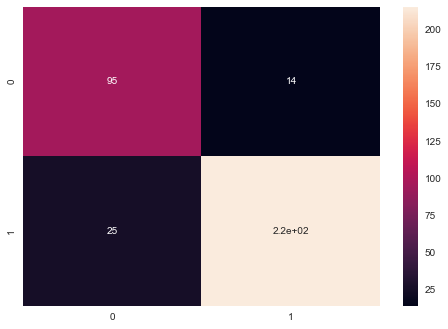

In [114]:
import seaborn as sns
sns.heatmap(cf_matrix_rfc, annot=True)

<AxesSubplot:>

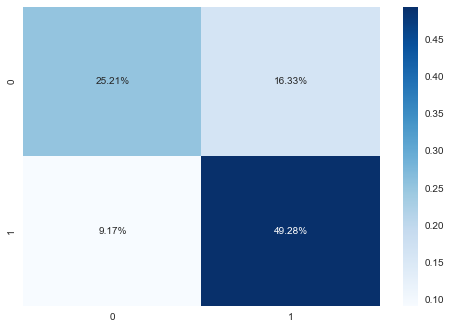

In [115]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

<AxesSubplot:>

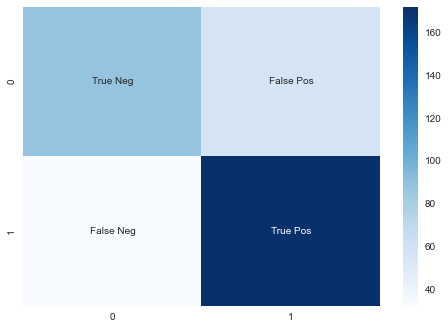

In [116]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

<AxesSubplot:>

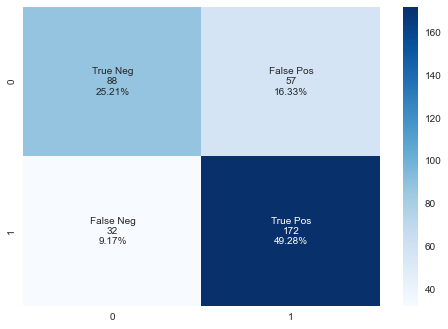

In [117]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

<AxesSubplot:>

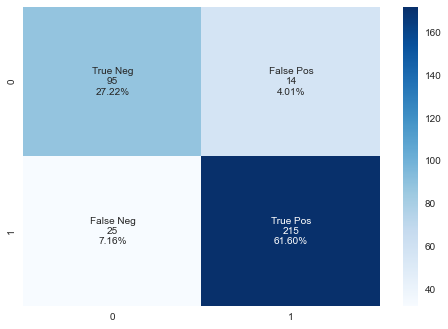

In [118]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_rfc.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_rfc.flatten()/np.sum(cf_matrix_rfc)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

In [119]:
# SVM
model1 = SVM
# knn
model2 = RFC

# fit model
model1.fit(X_train, Y_train)
model2.fit(X_train, Y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [120]:
print(pred_prob2)

[[0.62383333 0.37616667]
 [0.79766667 0.20233333]
 [0.19048095 0.80951905]
 [0.36697857 0.63302143]
 [0.2708196  0.7291804 ]
 [0.14357448 0.85642552]
 [0.2056364  0.7943636 ]
 [0.17841568 0.82158432]
 [0.23538324 0.76461676]
 [0.51035107 0.48964893]
 [0.01497857 0.98502143]
 [0.08296508 0.91703492]
 [0.12788082 0.87211918]
 [0.46222613 0.53777387]
 [0.21071429 0.78928571]
 [0.66695693 0.33304307]
 [0.06033639 0.93966361]
 [0.95457778 0.04542222]
 [0.11085595 0.88914405]
 [0.07562486 0.92437514]
 [0.54102728 0.45897272]
 [0.39593333 0.60406667]
 [0.70123214 0.29876786]
 [0.62851386 0.37148614]
 [0.52143916 0.47856084]
 [0.19706667 0.80293333]
 [0.38554126 0.61445874]
 [0.84334286 0.15665714]
 [0.7250154  0.2749846 ]
 [0.00454444 0.99545556]
 [0.67602872 0.32397128]
 [0.33647024 0.66352976]
 [0.77725    0.22275   ]
 [0.75975357 0.24024643]
 [0.82670119 0.17329881]
 [0.96882897 0.03117103]
 [0.48562134 0.51437866]
 [0.79573387 0.20426613]
 [0.43544642 0.56455358]
 [0.07140635 0.92859365]


In [121]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(Y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

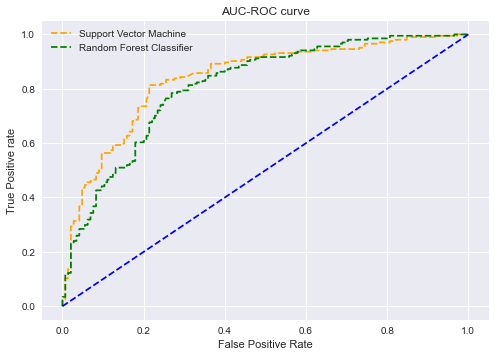

In [122]:

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Support Vector Machine')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('AUC-ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [82]:
# statitics for SVM
stats = report_results(RFC, X_test, Y_test)
print("-------------------------------------------------------------------------")
print("statitics for SVM")
print(stats)
print("-------------------------------------------------------------------------")
print()

-------------------------------------------------------------------------
statitics for SVM
{'auc': 0.7291920216362406, 'f1': 0.6807387862796834, 'acc': 0.6532951289398281, 'precision': 0.7371428571428571, 'recall': 0.6323529411764706, 'TN': 99, 'FP': 46, 'FN': 75, 'TP': 129, 'True Negative rate': 0.6827586206896552}
-------------------------------------------------------------------------



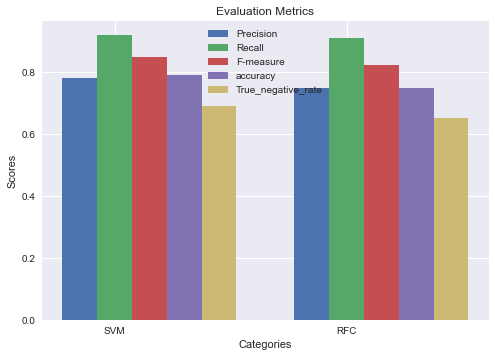

In [125]:
import matplotlib.pyplot as plt
import numpy as np

categories = ["SVM", "RFC"]
precision = [0.78, 0.75]
recall = [0.92, 0.91]
f_measure = [0.85, 0.824]
accuracy = [0.79,0.75]
Tnr = [0.69,0.651]




index = np.arange(len(categories))
width = 0.15

plt.bar(index, precision, width, label="Precision")
plt.bar(index + width, recall, width, label="Recall")
plt.bar(index + 2*width, f_measure, width, label="F-measure")
plt.bar(index + 3*width, accuracy ,width,label = "accuracy")
plt.bar(index + 4*width, Tnr ,width,label = "True_negative_rate")

plt.title("Evaluation Metrics")
plt.xlabel("Categories")
plt.ylabel("Scores")
plt.xticks(index + width, categories)
plt.legend(loc="best")
plt.grid(True)

plt.show()


In [84]:
# Create a hard voting ensemble of the individual models
voting_clf = VotingClassifier(estimators=[('lr', SVM), ('dt', RFC)], voting='hard')


print(voting_clf)

VotingClassifier(estimators=[('lr',
                              SVC(C=0.75, kernel='linear', probability=True)),
                             ('dt', RandomForestClassifier(n_estimators=6))])


In [85]:
voting_clf.fit(X_train, Y_train)

VotingClassifier(estimators=[('lr',
                              SVC(C=0.75, kernel='linear', probability=True)),
                             ('dt', RandomForestClassifier(n_estimators=6))])

In [86]:
y_pred_voting_clf = voting_clf.predict(X_test)

In [87]:
print(y_pred_voting_clf)

[0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0
 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1
 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1
 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0
 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1
 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0
 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0
 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0]


In [88]:
pickle.dump(voting_clf , open('model_voting.pkl','wb'))